# Bike Sharing Assignment

In [250]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
df = pd.read_csv("./day.csv", low_memory=False)
df.shape

(730, 16)

## Initial data inspection

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [253]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There seem to be no missing values in the data. 
- Data types also seem to be ok. Only one column has "object" data type.

In [254]:
df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [255]:
# Inspect weekdays    
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['weekday_n'] = df['dteday'].dt.day_name()
df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_n
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Monday
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Tuesday
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Wednesday
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Thursday
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Friday
5,6,2018-01-06,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,Saturday
6,7,2018-01-07,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,Sunday
7,8,2018-01-08,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959,Monday
8,9,2018-01-09,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822,Tuesday
9,10,2018-01-10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,Wednesday


### Weekdays are labelled wrongly
- Monday labelled as 6 and tuesday labelled as 0
- Workingday column will also be wrong now. Because 6 and 0 are being considered as weekend.
  
#### Correcting weekday and workingday

In [256]:
df['weekday'] = df['dteday'].dt.weekday
df['workingday'] = 1
for index, row in df.iterrows():
    if row['weekday'] in [5, 6] or row['holiday'] == 1:
        df.at[index,'workingday'] = 0
if 'weekday_n' in list(df.columns):
    print('dropping extra')
    df.drop(['weekday_n'], axis=1,inplace=True)
df.head(15)


dropping extra


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,1,0,5,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,1,0,6,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,1,0,0,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,1,0,1,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,1,0,2,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### workingday and weekday are now corrected

#### Drop "casual", "registered" becuase they are parts of the output "cnt"
#### Drop "instant" because it is only an index
#### Drop "dteday" because it is broken into years, month and day and these columns are already present in the data.

In [257]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df.shape

(730, 12)

In [258]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.993151,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.003072,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Check unique values for categorical features

In [259]:
categoricals = []
continuous = []
for col in df.columns:
    if col in ['instant', 'casual', 'registered', 'cnt']:
        continue
    if df[col].dtype == np.int64:
        print(f'{(col+":").ljust(15)} {df[col].unique()}')
        categoricals.append(col)
    elif df[col].dtype == np.float64:
        continuous.append(col)
print(categoricals)
print(continuous)

season:         [1 2 3 4]
yr:             [0 1]
mnth:           [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday:        [0 1]
weekday:        [0 1 2 3 4 5 6]
workingday:     [1 0]
weathersit:     [2 1 3]
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'atemp', 'hum', 'windspeed']


## We are not converting categorical values to labels, right now, because numerical values are easier to deal with.
### However we will create dummy variables for the following categorical variables:
- Season
- Weekday
- mnth
- holiday
- workingday
- weathersit
  
### **weathersit is could have been treated as an ordinal variable, because it describes weather which gets increasingly worst. So 1 represents good weather and 4 represents the worst weather. Thus there is order to the variable. It is treated as categorical, because we do not know the gap between intervals and creating dummy variables helps us analyse effect of each weather condition on the target variable
### **yr represents increasing popularity, so can be treated as ordinal. There are only two years in the data - so it should not make a difference.

## Correction in Seasons

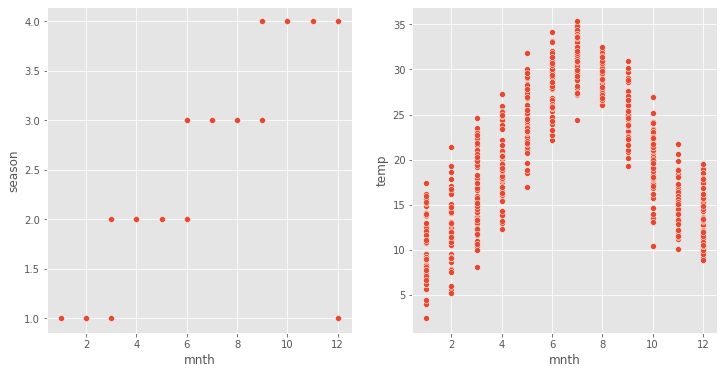

In [260]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df['mnth'], df['season'])
plt.subplot(1, 2, 2)
sns.scatterplot(df['mnth'], df['temp'])
plt.show()

### plot of season vs month and season vs temp shows that season labels are wrong.
- seasons are labeled as 1: spring, 2: summer, 3: Fall, 4: Winter
- But months for spring should be march, april, may, june.
  
### So Season labels should be: 1: Winter, 2: Spring, 3: Summer, 4: Fall

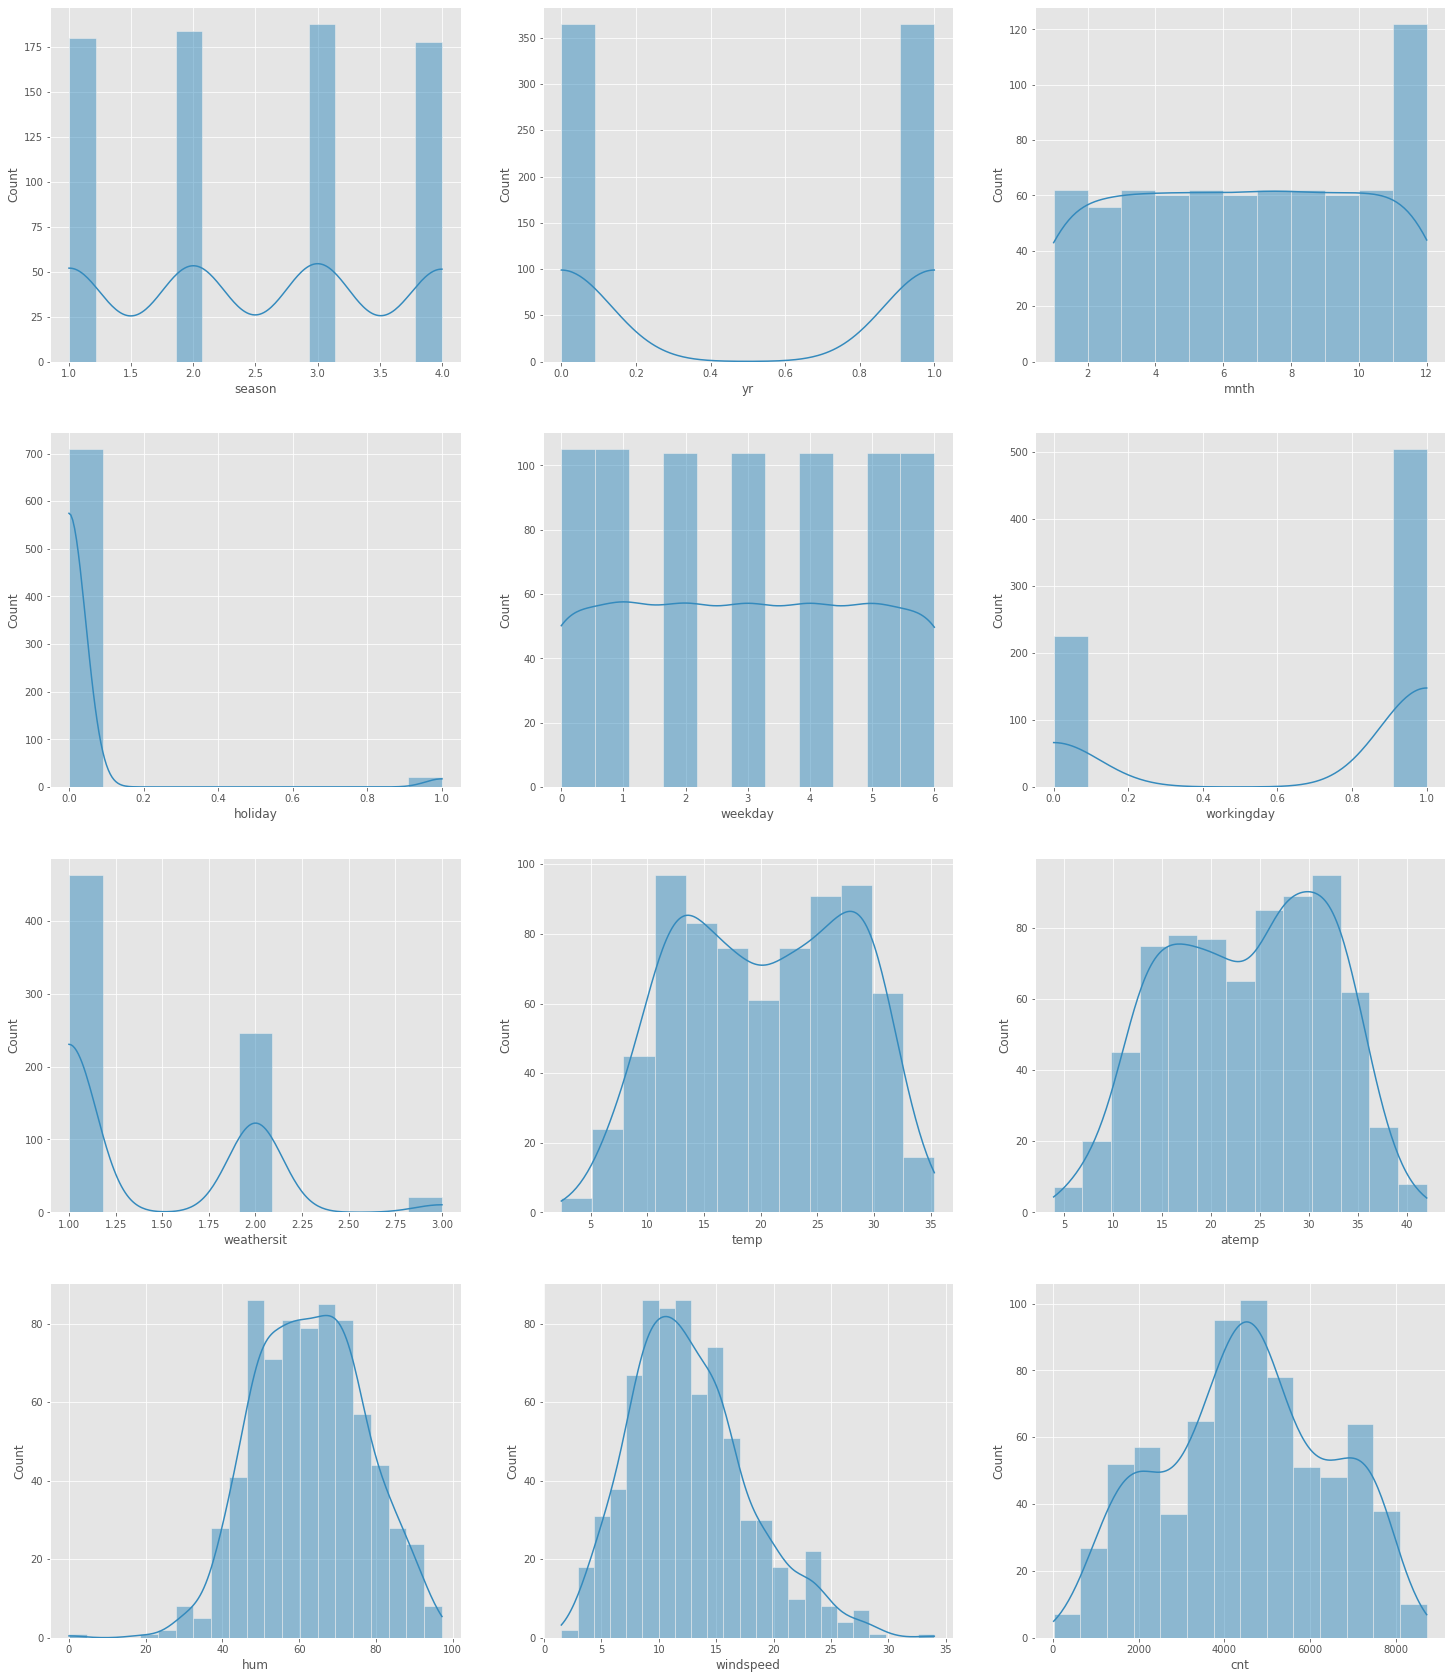

In [261]:
dfplot1 = df
fig1, axes = plt.subplots(nrows= 4, ncols = 3, figsize=(25, 30))
for i, c in enumerate(dfplot1.columns):
    sns.histplot(dfplot1[c], kde=True, ax=axes[i // 3, i % 3])
plt.show()

#### Pair plot of features
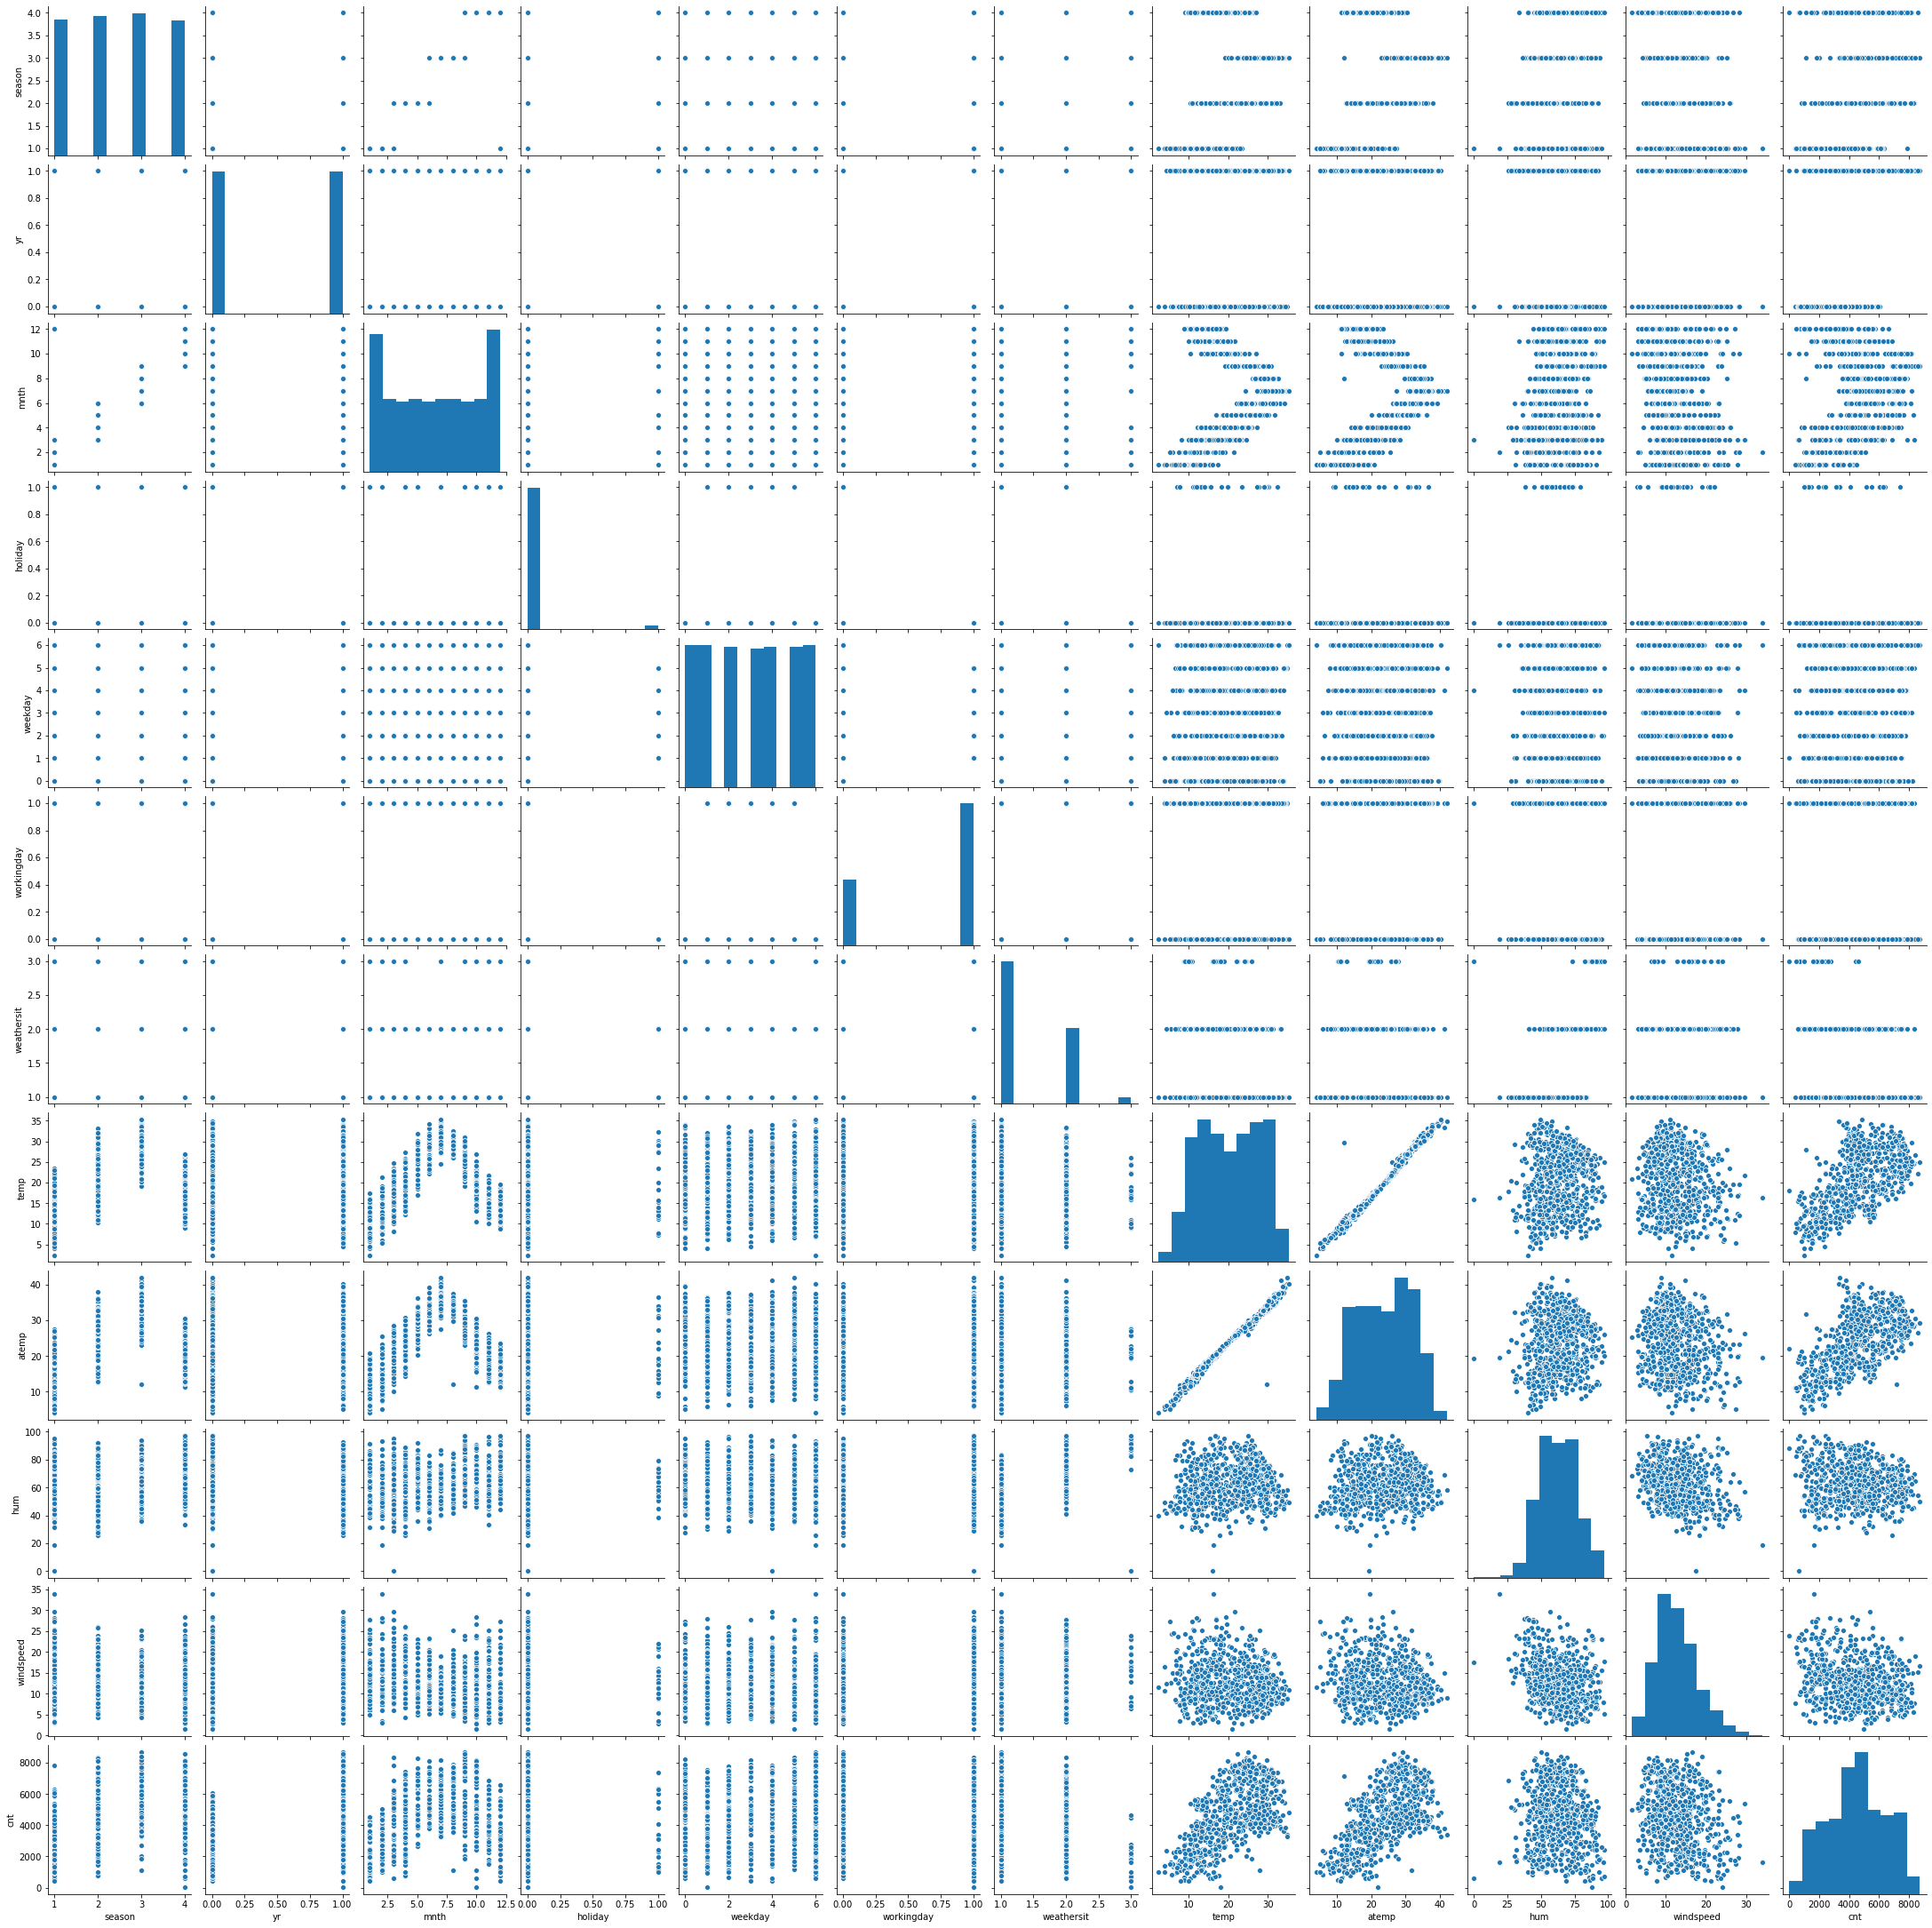

#### Observations
- Season and month seem to have high positive correlation
- temp and atemp are highly correlated

In [262]:
# This can be uncommented to generate the pairplot above - but takes a long time to run
# sns.pairplot(dfplot1)
# plt.show()

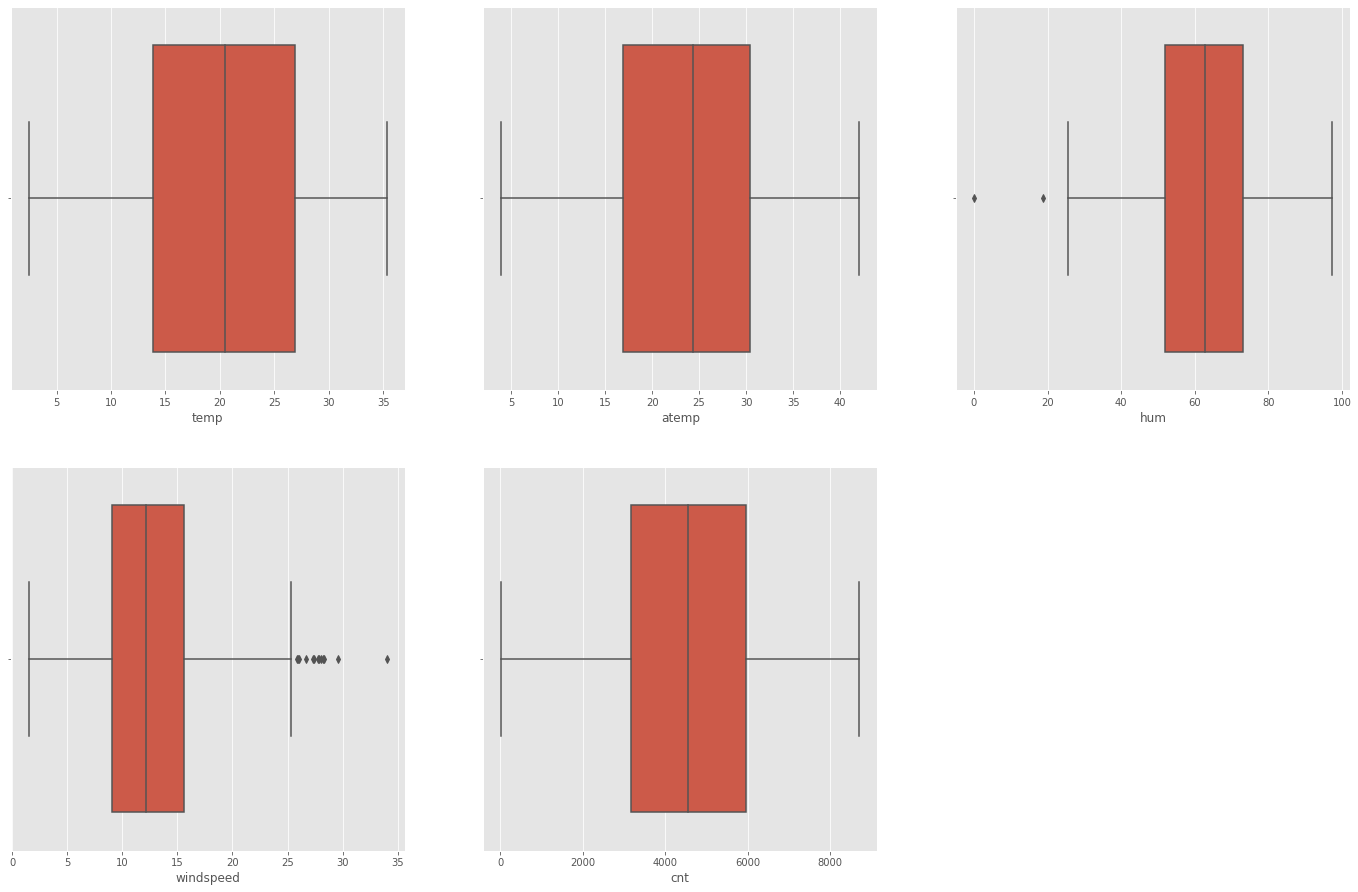

In [263]:
plt.figure(figsize=(24, 24))
for i, col in enumerate(continuous+['cnt']):    
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
plt.show()

- Windspeed and humidity have outliers. 
- Dropping outliers

In [264]:
def get_quantile_values(col, dfin, qr=1.5):
    _iqr = dfin[col].quantile(0.75) - dfin[col].quantile(0.25)
    _liqr = dfin[col].quantile(0.25) - _iqr * qr
    _uiqr = dfin[col].quantile(0.75) + _iqr * qr
    return _liqr, _uiqr

liqr_hum, uiqr_hum = get_quantile_values('hum', df)
df = df.loc[~(df['hum'] < liqr_hum)]
# Drop windspeed outliers
liqr_ws, uiqr_ws = get_quantile_values('windspeed', df)
df = df.loc[~(df['windspeed'] > uiqr_ws)]
df.shape

(716, 12)

### Analyse categorical variable effect on average bookings
- Average of bookings is plotted for each level in each categorical variable

In [265]:
df.cnt.sum()

3248215

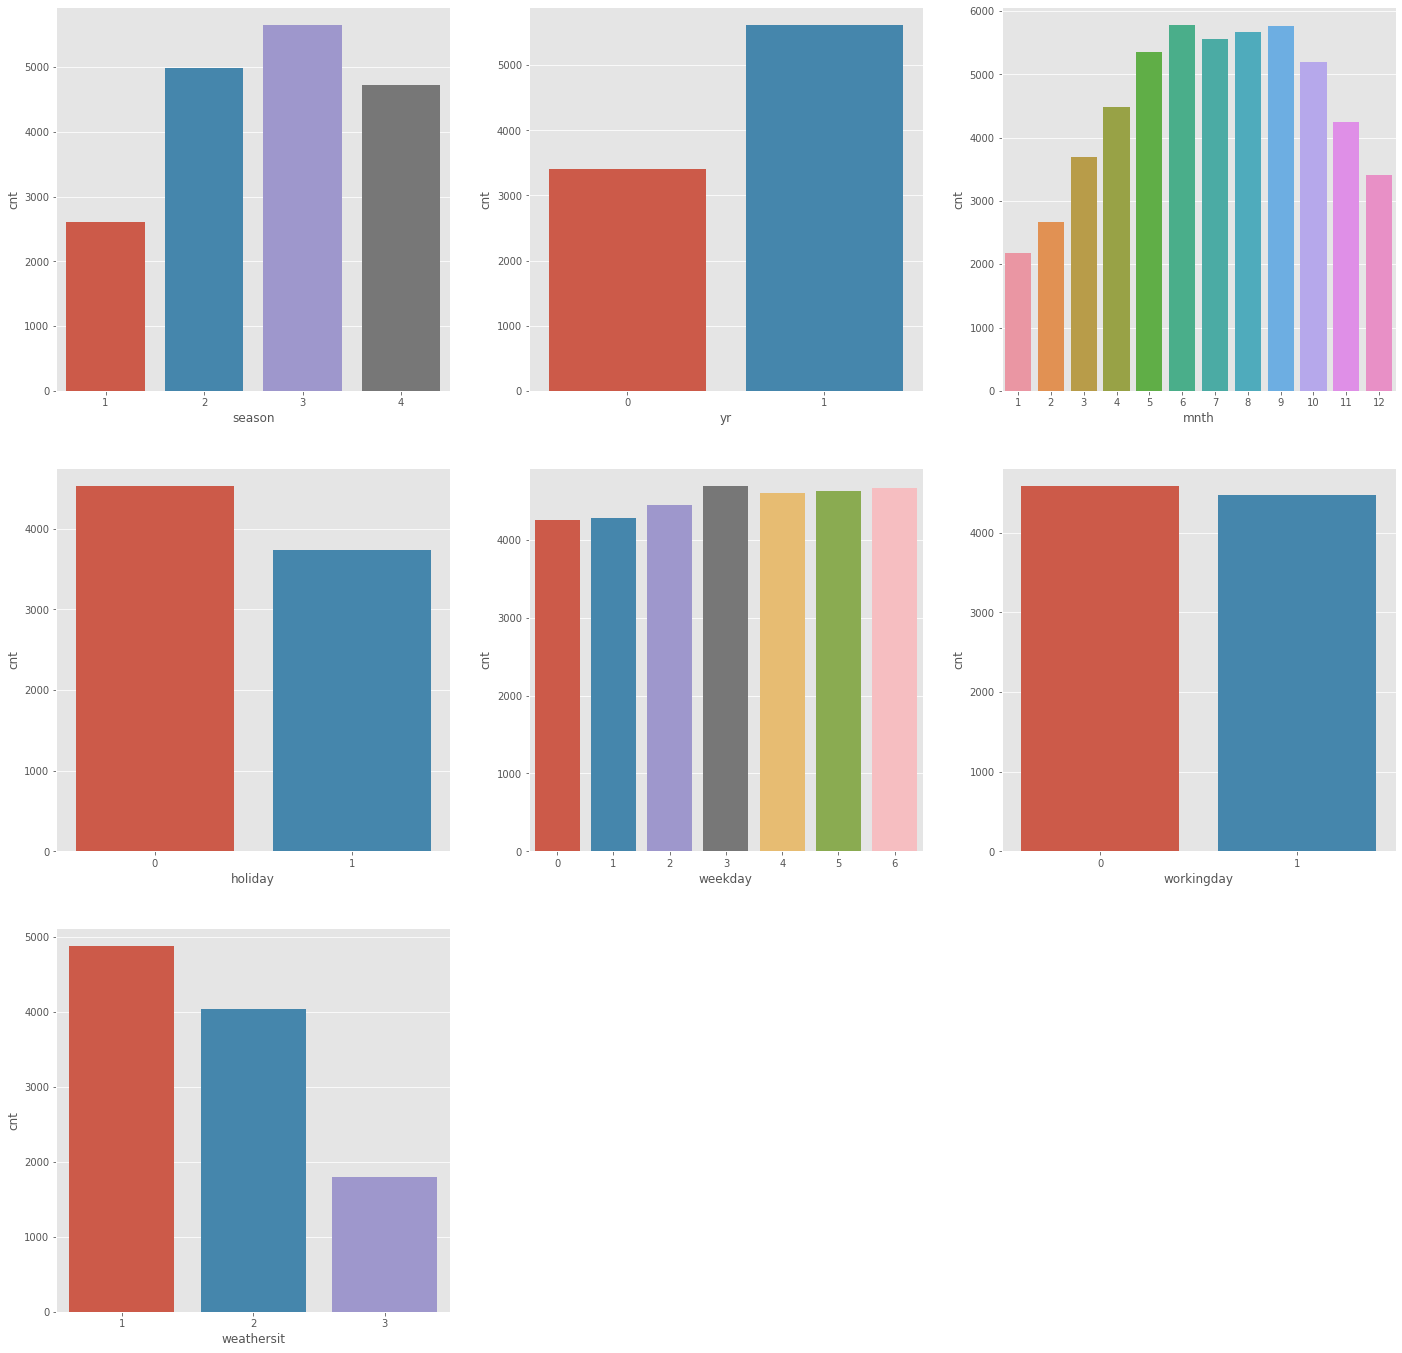

In [266]:
n_cols = 3
fullCnt = df.cnt.sum()
plt.figure(figsize=(24, 24))
for i, col in enumerate(categoricals):    
    g = dfplot1.groupby([col]).mean()
    plt.subplot(3, 3, i+1)
    sns.barplot(data=g, x=g.index, y=g['cnt'])
plt.show()

#### Observations
- 'season' and 'month' seem to have similar effect. This is expected because each season is 4 consecutive months. We may be able to drop one based on VIF and p-values.
- 'weathersit' - as weather gets worse bookings drop
- 'weekday' and 'workingday' seem to have not much effect on bookings - we should be able to drop these based on VIF and p-values.
- 'holiday' and 'yr' seem to be important.

### Check Correlations

In [267]:
drop_cols = categoricals
dfhm = df.drop(drop_cols, axis=1)
dfcorr = dfhm.corr()
dfcorr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991732,0.115823,-0.140355,0.625421
atemp,0.991732,1.000000,0.128144,-0.166220,0.628802
hum,0.115823,0.128144,1.000000,-0.204546,-0.134521
windspeed,-0.140355,-0.166220,-0.204546,1.000000,-0.216685
cnt,0.625421,0.628802,-0.134521,-0.216685,1.000000


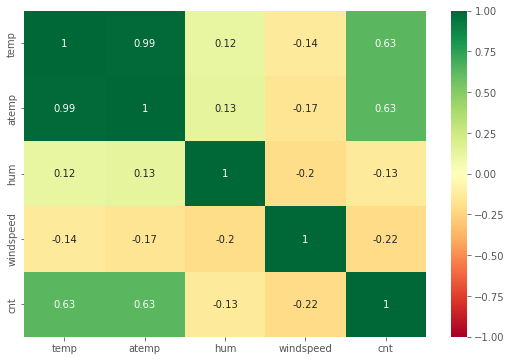

In [268]:
plt.figure(figsize=(9, 6))
sns.heatmap(dfcorr, 
            xticklabels = dfcorr.columns.values,
            yticklabels = dfcorr.columns.values,
            vmin = -1.0, vmax = 1.0,
            annot = True, cmap="RdYlGn");
plt.show()

- 'atemp' and 'temp' have 99% correlation - one of them can be dropped.
#### We will keep temp and drop atemp - because temp is easy to explain and measure

In [269]:
df1 = df.drop(['atemp'],axis=1)
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Create dummy variables

In [270]:
to_onehot = categoricals
df1 = pd.get_dummies(df1, columns=to_onehot, prefix=to_onehot, drop_first=True)
df1.shape

(716, 29)

In [271]:
df1.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### train test split

In [272]:
from sklearn.model_selection import train_test_split
# 1, 6, 
# 9 - 0.86
train, test = train_test_split(df1, test_size=0.2, random_state=1)
print(train.shape, test.shape)

(572, 29) (144, 29)


### Scaling
- dummy variables are already in range 0, 1
- we will scale continuous variables with minmax scaler

In [273]:
from sklearn.preprocessing import MinMaxScaler
final_continuous = ['temp','hum','windspeed']
scaler = MinMaxScaler()
scaler.fit(train[final_continuous])
train[final_continuous] = scaler.transform(train[final_continuous])
test[final_continuous] = scaler.transform(test[final_continuous])
train.describe()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,0.553900,0.515411,0.420536,4588.141608,0.250000,0.270979,0.256993,0.503497,0.073427,0.066434,...,0.031469,0.145105,0.150350,0.145105,0.139860,0.136364,0.136364,0.701049,0.323427,0.031469
std,0.228826,0.194168,0.210359,1903.756923,0.433392,0.444854,0.437358,0.500425,0.261064,0.249256,...,0.174733,0.352515,0.357727,0.352515,0.347145,0.343475,0.343475,0.458199,0.468193,0.174733
min,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.353871,0.367076,0.268027,3343.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.564921,0.517045,0.394414,4593.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.755981,0.651315,0.556506,6031.750000,0.250000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train the model

In [274]:
y = train.pop('cnt')
y_test = test.pop('cnt')
X = train
print(X.shape, y.shape)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_smf = sm.add_constant(X)
lrf = sm.OLS(y, x_smf)
mdlf = lrf.fit()
mdlf.summary()

(572, 28) (572,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.68e-198
Time:                        11:57:28   Log-Likelihood:                -4601.5
No. Observations:                 572   AIC:                             9261.
Df Residuals:                     543   BIC:                             9387.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1787.2927    545.151      3.279      0.001     716.428    2858.157
temp          3347.5770    392.236      8.535      0.000    2577.092    4118.062
hum          -1141.2194    248.467     -4.593      0.000   -1629.293    -653.146
windspeed     -935.8868    168.213     -5.564      0.000   -1266.315    -605.459
season_2      1004.9208    221.925      4.528      0.000     568.983    1440.858
season_3       936.4138    255.024      3.672      0.000     435.459    1437.369
season_4      1498.1257    218.584      6.854      0.000    1068.752    1927.500
yr_1          2037.2371     67.097     30.362      0.000    1905.435    2169.039
mnth_2         251.1882    167.441      1.500      0.134     -77.723     580.100
mnth_3         626.8388    206.908      3.030      0.003     220.400    1033.278
mnth_4         421.1779    296.202      1.422      0.156    -160.664    1003.020
mnth_5         841.1031    323.978      2.596      0.010     204.699    1477.507
mnth_6         518.7356    339.783      1.527      0.127    -148.714    1186.185
mnth_7          78.6345    371.087      0.212      0.832    -650.308     807.577
mnth_8         488.2443    355.317      1.374      0.170    -209.720    1186.208
mnth_9        1004.3319    313.916      3.199      0.001     387.694    1620.970
mnth_10        694.5081    283.123      2.453      0.014     138.358    1250.658
mnth_11        120.6484    270.414      0.446      0.656    -410.538     651.835
mnth_12         35.8892    221.963      0.162      0.872    -400.122     471.901
holiday_1     -944.0645    461.227     -2.047      0.041   -1850.073     -38.056
weekday_1       -5.5128    121.196     -0.045      0.964    -243.584     232.558
weekday_2       83.1031    121.082      0.686      0.493    -154.743     320.949
weekday_3      248.3993    121.730      2.041      0.042       9.279     487.519
weekday_4      224.7052    122.519      1.834      0.067     -15.964     465.374
weekday_5     -141.0969    515.865     -0.274      0.785   -1154.432     872.238
weekday_6      -50.3807    509.995     -0.099      0.921   -1052.186     951.424
workingday_1  -339.1510    507.317     -0.669      0.504   -1335.695     657.393
weathersit_2  -403.5076     90.379     -4.465      0.000    -581.043    -225.972
weathersit_3 -1844.5105    228.307     -8.079      0.000   -2292.983   -1396.038
==============================================================================
Omnibus:                       94.098   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.191
Skew:                          -0.782   Prob(JB):                     3.21e-62
Kurtosis:                       6.071   Cond. No.                         59.9
==============================================================================

Notes:
[1] Stand

In [275]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending=False)
vif

,features,vif
0,temp,51.86
25,workingday_1,23.14
1,hum,17.40
4,season_3,16.82
12,mnth_7,12.41
3,season_2,11.75
5,season_4,11.71
13,mnth_8,11.16
11,mnth_6,8.86
10,mnth_5,8.58


- Adjusted R--squared is 0.835
- VIF and p-value for month columns is high

  
### we will drop mnth columns

### Model 2: Drop 'mnth' and retrain

In [276]:
dropcols = ['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
    'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12']
X = train.drop(dropcols, axis=1)
print(X.shape, y.shape)
x_smf = sm.add_constant(X)
lrf = sm.OLS(y, x_smf)
mdlf = lrf.fit()
mdlf.summary()

(572, 17) (572,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.10e-195
Time:                        11:57:28   Log-Likelihood:                -4635.9
No. Observations:                 572   AIC:                             9308.
Df Residuals:                     554   BIC:                             9386.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1838.2910    565.759      3.249      0.001     726.996    2949.586
temp          3864.2123    282.007     13.703      0.000    3310.278    4418.146
hum           -921.8003    249.101     -3.701      0.000   -1411.099    -432.502
windspeed     -917.5196    174.942     -5.245      0.000   -1261.151    -573.888
season_2      1234.0659    132.920      9.284      0.000     972.976    1495.155
season_3       912.0481    172.535      5.286      0.000     573.145    1250.952
season_4      1566.7672    110.824     14.137      0.000    1349.081    1784.454
yr_1          2032.8336     69.608     29.204      0.000    1896.105    2169.562
holiday_1    -1106.2730    480.967     -2.300      0.022   -2051.016    -161.530
weekday_1       -8.6318    127.126     -0.068      0.946    -258.339     241.075
weekday_2      107.9730    126.772      0.852      0.395    -141.040     356.986
weekday_3      276.5152    126.367      2.188      0.029      28.298     524.732
weekday_4      226.8554    127.551      1.779      0.076     -23.688     477.398
weekday_5     -249.7631    538.975     -0.463      0.643   -1308.449     808.922
weekday_6     -140.4429    533.225     -0.263      0.792   -1187.832     906.947
workingday_1  -462.2978    529.975     -0.872      0.383   -1503.305     578.709
weathersit_2  -391.1239     93.406     -4.187      0.000    -574.598    -207.650
weathersit_3 -1894.9964    236.880     -8.000      0.000   -2360.289   -1429.703
==============================================================================
Omnibus:                       67.163   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.376
Skew:                          -0.642   Prob(JB):                     4.95e-34
Kurtosis:                       5.188   Cond. No.                         58.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [277]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending=False)
vif

,features,vif
0,temp,23.99
14,workingday_1,19.39
1,hum,15.75
4,season_3,6.90
2,windspeed,5.72
12,weekday_5,4.08
13,weekday_6,4.04
3,season_2,3.78
5,season_4,2.71
15,weathersit_2,2.44


Dropping "mnth"
   - Adj. R-squared is now 0.817 which is almost 2% drop
   
#### Dropping "mnth" has made the model much simpler and adjusted R-squared has not dropped much
  
workingday_1 has VIF > 5 and large p-value  
Season, hum, temp columns have VIF > 5 but 0 p-values  
we will try dropping workingday

### Model 3: Drop 'mnth' and 'workingday' and retrain

In [278]:
dropcols = ['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
    'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'workingday_1']
X = train.drop(dropcols, axis=1)
print(X.shape, y.shape)
x_smf = sm.add_constant(X)
lrf = sm.OLS(y, x_smf)
mdlf = lrf.fit()
mdlf.summary()

(572, 16) (572,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     160.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.51e-196
Time:                        11:57:28   Log-Likelihood:                -4636.3
No. Observations:                 572   AIC:                             9307.
Df Residuals:                     555   BIC:                             9381.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1373.7720    191.018      7.192      0.000     998.565    1748.979
temp          3880.4252    281.333     13.793      0.000    3327.817    4433.033
hum           -920.2720    249.042     -3.695      0.000   -1409.451    -431.093
windspeed     -925.1607    174.685     -5.296      0.000   -1268.286    -582.036
season_2      1224.6608    132.454      9.246      0.000     964.489    1484.833
season_3       902.3312    172.138      5.242      0.000     564.209    1240.453
season_4      1556.6220    110.188     14.127      0.000    1340.185    1773.059
yr_1          2038.4561     69.294     29.417      0.000    1902.345    2174.567
holiday_1     -724.2912    198.884     -3.642      0.000   -1114.948    -333.634
weekday_1       -4.3710    127.004     -0.034      0.973    -253.839     245.097
weekday_2      114.5813    126.519      0.906      0.366    -133.932     363.095
weekday_3      276.4971    126.340      2.189      0.029      28.335     524.659
weekday_4      227.0309    127.524      1.780      0.076     -23.457     477.519
weekday_5      206.8539    128.351      1.612      0.108     -45.259     458.967
weekday_6      310.9327    128.696      2.416      0.016      58.142     563.724
weathersit_2  -387.9764     93.317     -4.158      0.000    -571.273    -204.679
weathersit_3 -1890.4772    236.772     -7.984      0.000   -2355.557   -1425.398
==============================================================================
Omnibus:                       66.568   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.351
Skew:                          -0.638   Prob(JB):                     1.36e-33
Kurtosis:                       5.173   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending=False)
vif

,features,vif
0,temp,22.26
1,hum,12.16
4,season_3,6.87
2,windspeed,3.93
3,season_2,3.78
5,season_4,2.67
14,weathersit_2,2.36
6,yr_1,1.98
9,weekday_2,1.91
8,weekday_1,1.85


#### Adj. R-squared after dropping mnth and workingday is still the same

- VIF for temp and hum are high - but both have 0 p-values.  
- We will keep them for now.  
- p-values of weekday are high
- __We will try dropping weekday.__

### Model 4: drop 'mnth', 'weekday' and 'workingday' and train

In [280]:
mnthcols = ['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
    'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 
    'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1'] # 
X = train.drop(mnthcols, axis=1)
print(X.shape, y.shape)
x_smf = sm.add_constant(X)
lrf = sm.OLS(y, x_smf)
mdlf = lrf.fit()
mdlf.summary()

(572, 10) (572,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.32e-200
Time:                        11:57:28   Log-Likelihood:                -4642.4
No. Observations:                 572   AIC:                             9307.
Df Residuals:                     561   BIC:                             9355.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1539.9435    175.848      8.757      0.000    1194.543    1885.343
temp          3938.0820    282.027     13.963      0.000    3384.123    4492.041
hum           -968.7735    249.593     -3.881      0.000   -1459.025    -478.522
windspeed     -940.1409    175.298     -5.363      0.000   -1284.462    -595.820
season_2      1204.7607    132.790      9.073      0.000     943.935    1465.586
season_3       877.4163    172.484      5.087      0.000     538.622    1216.210
season_4      1544.1491    110.668     13.953      0.000    1326.775    1761.523
yr_1          2041.6515     69.556     29.353      0.000    1905.029    2178.274
holiday_1     -759.5911    196.771     -3.860      0.000   -1146.089    -373.093
weathersit_2  -370.9724     93.547     -3.966      0.000    -554.718    -187.227
weathersit_3 -1852.3868    236.345     -7.838      0.000   -2316.617   -1388.157
==============================================================================
Omnibus:                       67.255   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.839
Skew:                          -0.630   Prob(JB):                     1.96e-35
Kurtosis:                       5.263   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending=False)
vif

,features,vif
0,temp,21.26
1,hum,11.28
4,season_3,6.77
3,season_2,3.75
2,windspeed,3.55
5,season_4,2.66
8,weathersit_2,2.35
6,yr_1,1.95
9,weathersit_3,1.40
7,holiday_1,1.04



- Adj. R-squared before dropping 'weekday': 0.817
- Adj. R-squared after dropping 'weekday': 0.815
  
#### Not much change in Adj. R-squared even after dropping 'weekday'. And our model is even simpler.
- hum has high VIF
- We will try dropping 'hum'

### Model 5: Drop 'hum', 'mnth', 'weekday', and 'workingday' and train

In [282]:
mnthcols = ['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
    'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 
    'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'hum'] # 
X = train.drop(mnthcols, axis=1)
print(X.shape, y.shape)
x_smf = sm.add_constant(X)
lrf = sm.OLS(y, x_smf)
mdlf = lrf.fit()
mdlf.summary()

(572, 9) (572,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     272.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.28e-198
Time:                        11:57:28   Log-Likelihood:                -4650.0
No. Observations:                 572   AIC:                             9320.
Df Residuals:                     562   BIC:                             9363.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1165.2508    148.809      7.831      0.000     872.962    1457.540
temp          3688.8584    278.036     13.268      0.000    3142.742    4234.975
windspeed     -773.7104    172.087     -4.496      0.000   -1111.723    -435.698
season_2      1225.2333    134.335      9.121      0.000     961.374    1489.093
season_3       938.2879    173.906      5.395      0.000     596.702    1279.873
season_4      1501.9574    111.502     13.470      0.000    1282.945    1720.970
yr_1          2079.6360     69.721     29.828      0.000    1942.691    2216.581
holiday_1     -774.9047    199.178     -3.891      0.000   -1166.129    -383.680
weathersit_2  -590.9815     75.344     -7.844      0.000    -738.972    -442.991
weathersit_3 -2323.5080    205.318    -11.317      0.000   -2726.793   -1920.223
==============================================================================
Omnibus:                       64.558   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.006
Skew:                          -0.611   Prob(JB):                     1.62e-33
Kurtosis:                       5.201   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending=False)
vif

,features,vif
0,temp,14.94
3,season_3,6.51
2,season_2,3.72
1,windspeed,3.47
4,season_4,2.57
5,yr_1,1.95
7,weathersit_2,1.44
8,weathersit_3,1.11
6,holiday_1,1.04


- Dropping humidity did not make much difference in adjusted r2-squared
#### temp still has very high VIF - let us try dropping it

### Model 6: Drop 'temp', 'mnth', 'weekday', and 'workingday' and train

In [284]:
mnthcols = ['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
    'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 
    'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'hum', 'temp']
X = train.drop(mnthcols, axis=1)
x_smf = sm.add_constant(X)
lrf = sm.OLS(y, x_smf)
mdlf = lrf.fit()
mdlf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.16e-166
Time:                        11:57:28   Log-Likelihood:                -4727.9
No. Observations:                 572   AIC:                             9474.
Df Residuals:                     563   BIC:                             9513.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2341.0812    136.865     17.105      0.000    2072.252    2609.910
windspeed     -993.2534    196.116     -5.065      0.000   -1378.462    -608.045
season_2      2399.1390    115.731     20.730      0.000    2171.822    2626.456
season_3      2819.4331    115.294     24.454      0.000    2592.974    3045.892
season_4      2084.9823    117.331     17.770      0.000    1854.522    2315.442
yr_1          2155.2391     79.559     27.090      0.000    1998.971    2311.507
holiday_1     -728.5922    228.012     -3.195      0.001   -1176.450    -280.735
weathersit_2  -671.4597     85.985     -7.809      0.000    -840.350    -502.570
weathersit_3 -2539.6412    234.336    -10.838      0.000   -2999.920   -2079.362
==============================================================================
Omnibus:                       31.010   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.768
Skew:                          -0.312   Prob(JB):                     8.63e-15
Kurtosis:                       4.526   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- Adj. R-squared before dropping 'temp': 0.811
- Adj. R-squared after dropping 'temp' : 0.752
  
#### Dropping 'atemp' produced significant drop in Adj. R-squared. 
### We cannot drop 'atemp'


---
## Final Model

In [285]:
mnthcols = ['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
    'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 
    'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'hum']
X = train.drop(mnthcols, axis=1)
x_smf = sm.add_constant(X)
lrf = sm.OLS(y, x_smf)
model_final = lrf.fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     272.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.28e-198
Time:                        11:57:28   Log-Likelihood:                -4650.0
No. Observations:                 572   AIC:                             9320.
Df Residuals:                     562   BIC:                             9363.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1165.2508    148.809      7.831      0.000     872.962    1457.540
temp          3688.8584    278.036     13.268      0.000    3142.742    4234.975
windspeed     -773.7104    172.087     -4.496      0.000   -1111.723    -435.698
season_2      1225.2333    134.335      9.121      0.000     961.374    1489.093
season_3       938.2879    173.906      5.395      0.000     596.702    1279.873
season_4      1501.9574    111.502     13.470      0.000    1282.945    1720.970
yr_1          2079.6360     69.721     29.828      0.000    1942.691    2216.581
holiday_1     -774.9047    199.178     -3.891      0.000   -1166.129    -383.680
weathersit_2  -590.9815     75.344     -7.844      0.000    -738.972    -442.991
weathersit_3 -2323.5080    205.318    -11.317      0.000   -2726.793   -1920.223
==============================================================================
Omnibus:                       64.558   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.006
Skew:                          -0.611   Prob(JB):                     1.62e-33
Kurtosis:                       5.201   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending=False)
vif

,features,vif
0,temp,14.94
3,season_3,6.51
2,season_2,3.72
1,windspeed,3.47
4,season_4,2.57
5,yr_1,1.95
7,weathersit_2,1.44
8,weathersit_3,1.11
6,holiday_1,1.04


### Conclusion
- ALL variables have 0 p-value
- season_3 has high VIF but zero p-values 
- Only season_3 and temp have high VIF  
  
  
__In this study we:__    
- We performed EDA to explore the data
    - We removed some outliers
    - We dropped one obvious feature - temp
- We split the data into train-test 
- We trained a linear regression model using statsmodels and observed p-values and VIF
- We started with 27 features and initial adjusted R-square of 0.835
- Based on p-values and VIF we trimmed features to make our model simpler without sacrificing too much of initial adjusted R-square
- Final model has 9 features with adjusted R-squared of 0.806
- We were able to drop 18 features with only 3% decrease in R-square

#### Our Final model has 9 features: 

1. Year: As popularity increases bookings will increase
2. Feeling temperature: Bookings increase with higher temperatures
3. Wind speed: Bookings will decrease on windy days
4. Season:
    - Summer season: Summer season seems to have medium bookings amongst seasons
    - Fall season: Fall season has the least bookings amongst seasons
    - Winter season: Winter season will produce most bookings - this is counter-intuitive because temperatures are lower in winter - and needs further investigation
5. holiday - bookings are less on holidays
6. Weather:
    - weather_2 - misty cloudy - bookings decrease slightly for this
    - weather_3 - Thunderstorm snow and rain - bookings drop drastically for this
  
#### Our final model explains 81.1% of the variability in bookings

---
### Residuals Analysis - train

r2_score:  0.8137423003963686
Mean of resuduals 0.0000
Stdev of resuduals 821.6155


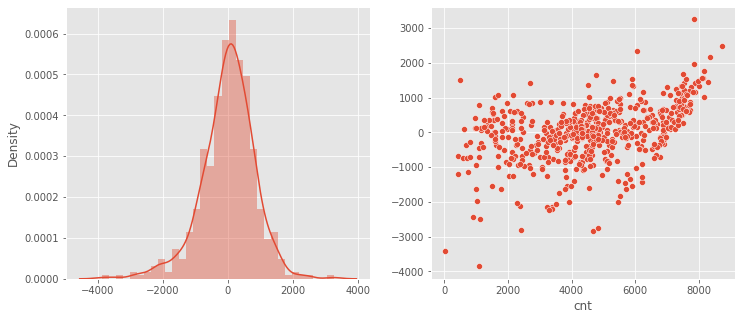

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
y_pred_sm = model_final.predict(x_smf)
print("r2_score: ", r2_score(y, y_pred_sm))

res = y - y_pred_sm
print(f"Mean of resuduals {abs(res.mean()):.4f}")
print(f"Stdev of resuduals {abs(res.std()):.4f}")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(res)
plt.subplot(1, 2, 2)
sns.scatterplot(y, res)
plt.show()

- Residuals are symmetrically spread.
- They have a mean of zero.
- Thus they satisfy the requirements of ranbomized errors with mean zero
- There is not a clear pattern between residuals and actual values

---
### Residuals Analysis - test

r2_score:  0.8219853192495807
Mean of resuduals 68.6006
Stdev of resuduals 856.0694


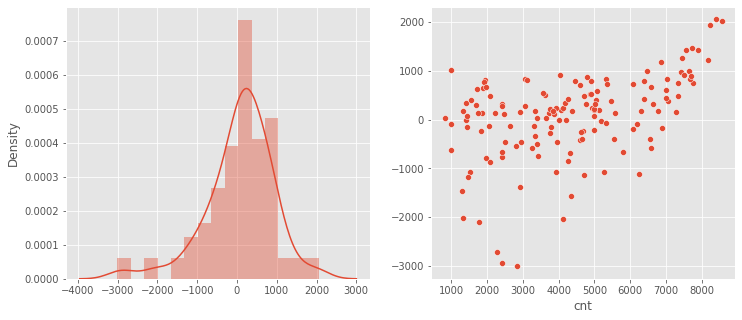

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_test = test.drop(mnthcols, axis=1)
x_test_sm = sm.add_constant(X_test)
y_test_pred_sm = model_final.predict(x_test_sm)
print("r2_score: ", r2_score(y_test, y_test_pred_sm))

res_test = y_test - y_test_pred_sm
print(f"Mean of resuduals {abs(res_test.mean()):.4f}")
print(f"Stdev of resuduals {abs(res_test.std()):.4f}")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(res_test)
plt.subplot(1, 2, 2)
sns.scatterplot(y_test, res_test)
plt.show()

- Mean of residuals for test data is only slightly away from 0 less than 10% of 1 stdev.
- There is a slight linear pattern between residuals and actual values, but not much

---
### Test set r2_score

In [289]:
r2_score(y_test, y_test_pred_sm)

0.8219853192495807

## Try an advanced method on the data

In [249]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regress_params = {
    "learning_rate": 0.25, "max_depth": 2, "n_estimators": 50, "subsample": 0.6, 
    "loss": "huber",
    "verbose": 0
}
model = GradientBoostingRegressor(**gb_regress_params)
model.fit(X, y)
y_pred = model.predict(X)
y_test_pred = model.predict(X_test)
print("Train r2_score".ljust(15), r2_score(y, y_pred))
print("Test r2_score".ljust(15), r2_score(y_test, y_test_pred))

Train r2_score  0.8988898844625932
Test r2_score   0.8544756654373102
